In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazmulalamdiptu","key":"f06a30af9919c40a0aa8093b098e33a6"}'}

In [2]:
! mkdir ~/kaggle

In [3]:
! cp kaggle.json ~/kaggle/

! chmod 600 ~/kaggle/kaggle.json

In [4]:

! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 161MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout
from keras.applications.vgg16 import VGG16

Transfer Learning

2.   Fine Tuning



In [45]:
conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_layer_9 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [47]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html



https://keras.io/api/data_loading/



In [50]:
# Load data
batch_size = 32
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(150, 150))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test/',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(150, 150))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True)


test_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [52]:
# Normalize

# def process(image,label):
#   image = tf.cast(image/255. ,tf.float32)
#   return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [53]:
# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))

In [54]:
# model.summary()

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch = 2000//batch_size,
                    epochs=30, validation_data=test_generator, validation_steps = 800//batch_size)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.7027 - loss: 0.5414 - val_accuracy: 0.9438 - val_loss: 0.1984
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.8674 - loss: 0.3014 - val_accuracy: 0.8662 - val_loss: 0.3427
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 268ms/step - accuracy: 0.8628 - loss: 0.3112 - val_accuracy: 0.8825 - val_loss: 0.2915
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.8942 - loss: 0.2630 - val_accuracy: 0.9463 - val_loss: 0.1484
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.8973 - loss: 0.2584 - val_accuracy: 0.9212 - val_loss: 0.1864
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 0.8935 - loss: 0.2518 - val_accuracy: 0.9325 - val_loss: 0.1778
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9107 - loss: 0.2177

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 951ms/step - accuracy: 0.9106 - loss: 0.2179 - val_accuracy: 0.9450 - val_loss: 0.0972
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step - accuracy: 0.9111 - loss: 0.2022 - val_accuracy: 0.9513 - val_loss: 0.1479
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 0.8371 - loss: 0.3709 - val_accuracy: 0.8475 - val_loss: 0.3128
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - accuracy: 0.9153 - loss: 0.1840 - val_accuracy: 0.9325 - val_loss: 0.1782
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9240 - loss: 0.1906 - val_accuracy: 0.9563 - val_loss: 0.1115
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - accuracy: 0.9222 - loss: 0.1784 - val_accuracy: 0.9762 - val_loss: 0.0616
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - accuracy: 0.9219 - loss: 0.2001 - val_accuracy: 0.9538 - val_loss: 0.1361
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9243 - loss: 0.1926 - val_accuracy: 0.

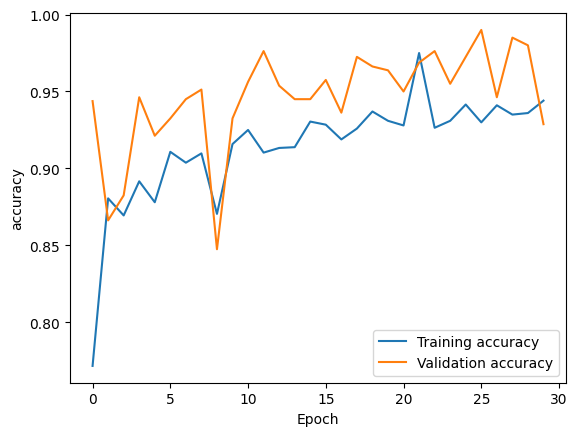

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

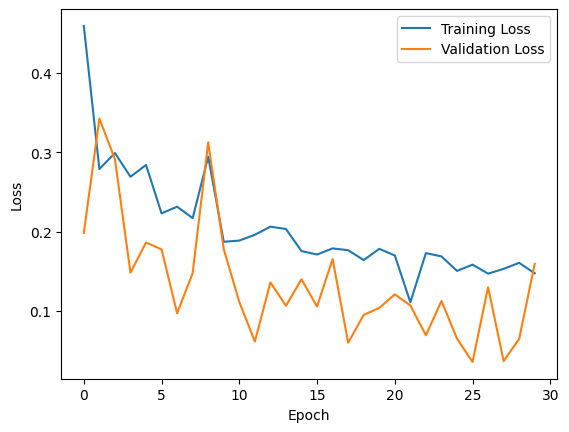

In [57]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

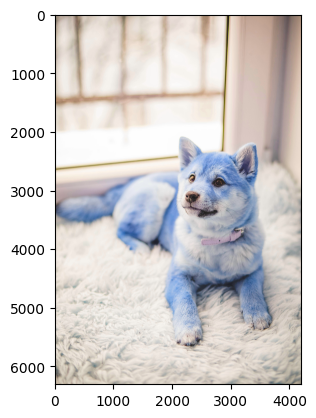

(6306, 4204, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)

In [60]:
import cv2
import numpy as np

img = cv2.imread("/content/dog.jpg")
plt.imshow(img)
plt.show()

print(img.shape)
cv2.resize(img,(150,150)).shape

input_image = cv2.resize(img, (150, 150))
input_image = input_image.reshape(1, 150, 150, 3) # Reshape using numpy and input_image
# 1 img or batch size = 1 with dimension 150,150,3
model.predict(input_image)